In [1]:
from imports import os, glob, pdb, np, h5py, pd, xr, gpd, Proj, Transformer, CRS, \
                        plt, cmap, Model, Data, ODR, datetime, rasterio, show, \
                        ccrs, cfeature
from classes_fixed import *
from pvpg_gt import *
from track_pairs import *

/home/s1803229/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Outliers in $\rho_v/\rho_g$ Estimation

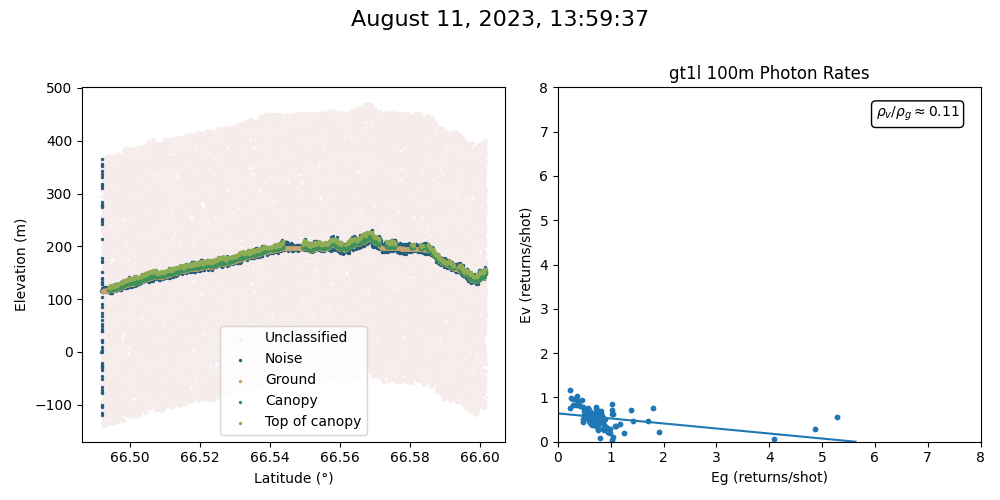

In [4]:
%matplotlib ipympl

dirpath = '../data/rovaniemi_w'
all_ATL03, all_ATL08 = track_pairs(dirpath)

N = 45
gt = 'gt1l'
atl03path = all_ATL03[N]
atl08path = all_ATL08[N]

pvpg_single(atl03path, atl08path, gt)

### Segments with abnormally high $E_g$

In [5]:
atl03 = ATL03(atl03path, atl08path, gt)
atl08 = ATL08(atl08path, gt)
atl08.df[atl08.df.Eg > 4]

lat        lon          gh            ch   Ng  Nv        Eg  \
32  66.572678  25.250801  196.695724  3.402823e+38  580   0  4.084507   
58  66.549500  25.244070  196.332703  1.371860e+01  729  54  5.282609   
62  66.545937  25.243048  196.892670  3.402823e+38  675   0  4.856115   

          Ev  
32  0.070423  
58  0.557971  
62  0.294964

### Show location of relevant segments on a map

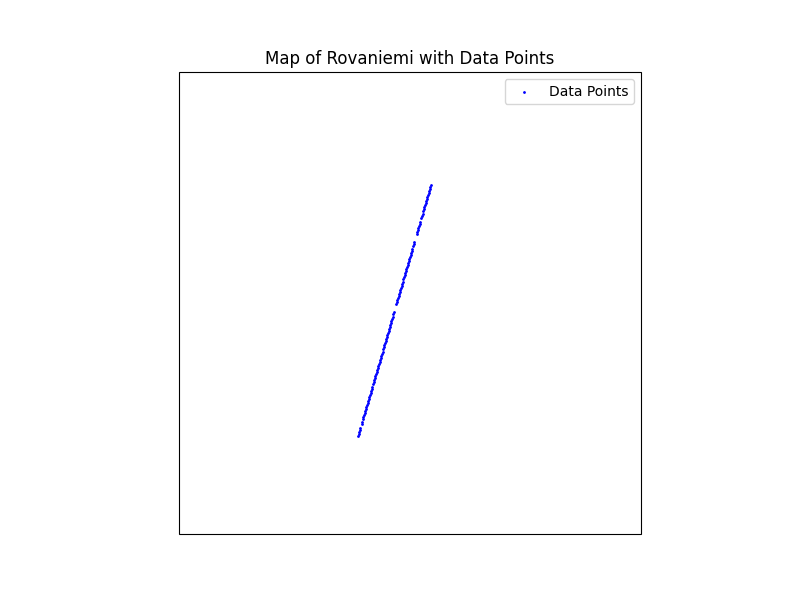

In [6]:
# Sample DataFrame with latitude and longitude columns
# Replace this with your actual DataFrame
df = atl08.df.loc[:,['lat','lon']]

# Create a map with Cartopy
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (8,6))
ax.set_extent([25.15,25.35,66.45,66.65])  # Set the map extent to cover Edinburgh

# Plot points from the DataFrame
ax.scatter(df['lon'], df['lat'], color='b', marker='o', label='Data Points', zorder=3, s=1)

tif = rasterio.open('../data/geotiffs/rovaniemi.tiff')
show(tif, ax=ax, transform=ccrs.PlateCarree())

# Add labels, title, and legend
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Map of Rovaniemi with Data Points')
ax.legend()

# Show the plot
plt.show()